# Walmart Sales EDA (Exploratory Data Analysis)

In [2]:
# Importamos la librerias que se usaran en este EDA
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import gc
import os
import sys
import warnings

In [3]:
# Definir las rutas de los archivos
features_path = r"D:\Python\Walmart Sales Forecast\archive\features.csv"
stores_path = r"D:\Python\Walmart Sales Forecast\archive\stores.csv"
test_path = r"D:\Python\Walmart Sales Forecast\archive\test.csv"
train_path = r"D:\Python\Walmart Sales Forecast\archive\train.csv"

# Cargar los archivos CSV en DataFrames
features_df = pd.read_csv(features_path)
stores_df = pd.read_csv(stores_path)
test_df = pd.read_csv(test_path)
train_df = pd.read_csv(train_path)

In [4]:
features_df.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [5]:
features_df.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [6]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [7]:
features_df.describe()

Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std     11276.462208   6792.329861   13086.690278    39.738346      1.877259  
min      -179.260000      0.220000    -185.170000   126.064000      3.684000  
25%         6.600000    304.687500    1440.827500   132.364839      6.634000  
50%        36.260000   1176.425000    2727.135000   182.764003      7.806000  
75%       163.150000   3310.007500    4832.555000   213.932412      8.567000  
max    149483.310000  67474.850000  771448.100000   228.976456     14.313000

In [8]:
features_df.nunique()

Store             45
Date             182
Temperature     4178
Fuel_Price      1011
MarkDown1       4023
MarkDown2       2715
MarkDown3       2885
MarkDown4       3405
MarkDown5       4045
CPI             2505
Unemployment     404
IsHoliday          2
dtype: int64

In [9]:
stores_df.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [10]:
stores_df.isna().sum()

Store    0
Type     0
Size     0
dtype: int64

In [11]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [12]:
stores_df.describe()

Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000

In [13]:
stores_df.nunique()

Store    45
Type      3
Size     40
dtype: int64

In [14]:
test_df.head()

Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False

In [15]:
test_df.isna().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [17]:
test_df.describe()

Store           Dept
count  115064.000000  115064.000000
mean       22.238207      44.339524
std        12.809930      30.656410
min         1.000000       1.000000
25%        11.000000      18.000000
50%        22.000000      37.000000
75%        33.000000      74.000000
max        45.000000      99.000000

In [18]:
test_df.nunique()

Store        45
Dept         81
Date         39
IsHoliday     2
dtype: int64

In [19]:
train_df.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

In [20]:
train_df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [22]:
train_df.describe()

Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000

In [23]:
train_df.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
dtype: int64

In [24]:
# Combinar los datos de ventas (train_df) con características adicionales (features_df) basándose en tres columnas clave
df = train_df.merge(features_df, on=['Store', 'Date', 'IsHoliday'], how='left')

In [25]:
print(df.shape)

(421570, 14)


In [26]:
df.head()

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1  2010-02-05      24924.50      False        42.31       2.572   
1      1     1  2010-02-12      46039.49       True        38.51       2.548   
2      1     1  2010-02-19      41595.55      False        39.93       2.514   
3      1     1  2010-02-26      19403.54      False        46.63       2.561   
4      1     1  2010-03-05      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment  
0         8.106  
1         8.106  
2         8.106  
3         8.106  
4         8.106

In [27]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [28]:
# Unir stores_df para incluir el tamaño y tipo de tienda
df = df.merge(stores_df, on='Store', how='left')

In [29]:
df.head()

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1  2010-02-05      24924.50      False        42.31       2.572   
1      1     1  2010-02-12      46039.49       True        38.51       2.548   
2      1     1  2010-02-19      41595.55      False        39.93       2.514   
3      1     1  2010-02-26      19403.54      False        46.63       2.561   
4      1     1  2010-03-05      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment Type    Size  
0         8.106    A  151315  
1         8.106    A  151315  
2         8.106    A  151315  
3         8.106    A  151315  
4         8.106    A  151315

In [30]:
df['Date'] = pd.to_datetime(df['Date'])

In [31]:
print(df['Date'].dtype)

datetime64[ns]


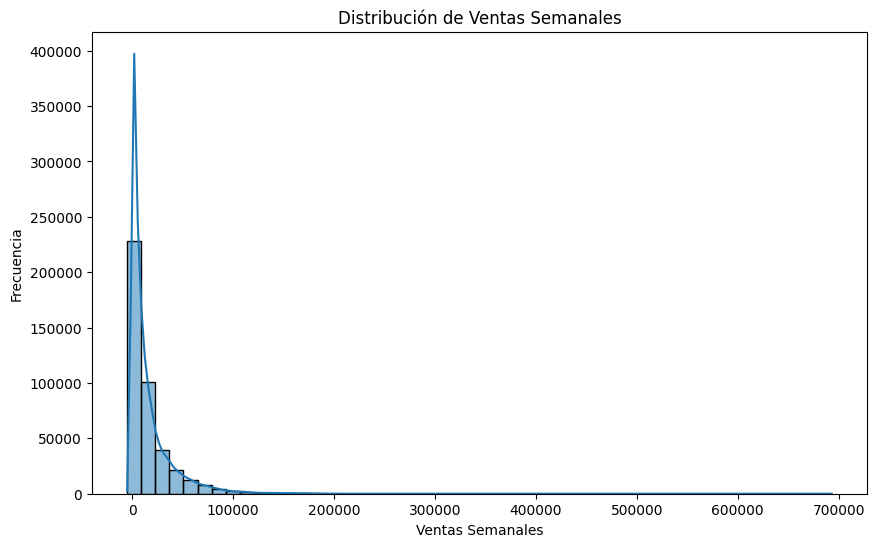

In [32]:
# Distribución de Ventas Semanales (Weekly_Sales)
plt.figure(figsize=(10, 6))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.title("Distribución de Ventas Semanales")
plt.xlabel("Ventas Semanales")
plt.ylabel("Frecuencia")
plt.show()

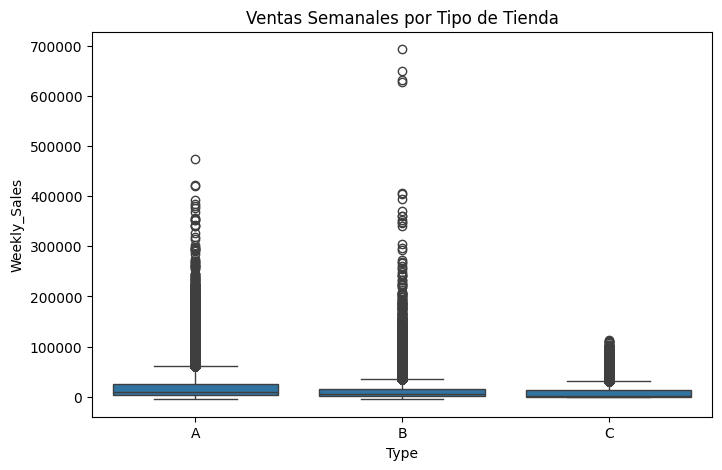

In [33]:
# Análisis de Ventas por Tipo de Tienda
plt.figure(figsize=(8, 5))
sns.boxplot(x='Type', y='Weekly_Sales', data=df)
plt.title("Ventas Semanales por Tipo de Tienda")
plt.show()

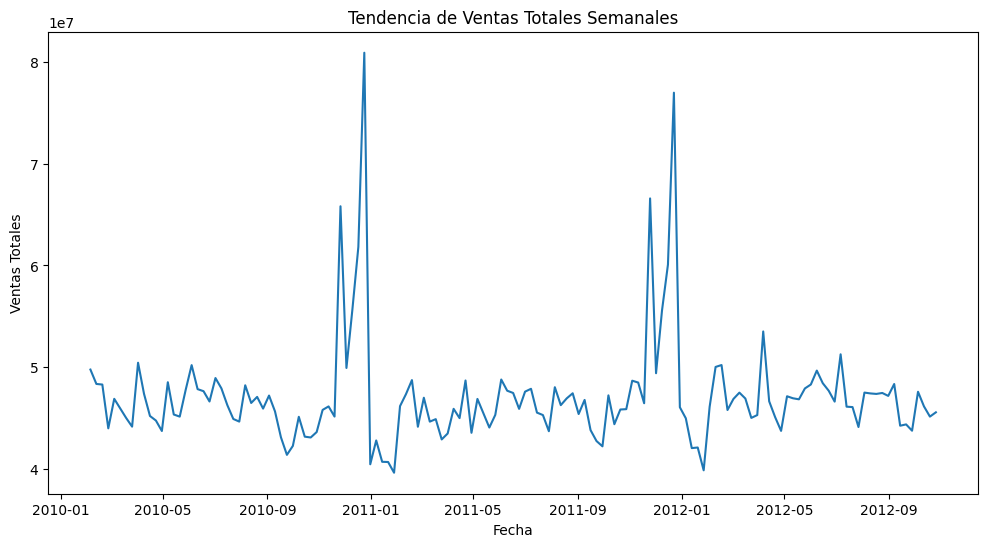

In [34]:
# Tendencia de Ventas en el Tiempo
df_grouped = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['Date'], df_grouped['Weekly_Sales'])
plt.title("Tendencia de Ventas Totales Semanales")
plt.xlabel("Fecha")
plt.ylabel("Ventas Totales")
plt.show()

In [35]:
df.duplicated().sum()

np.int64(0)

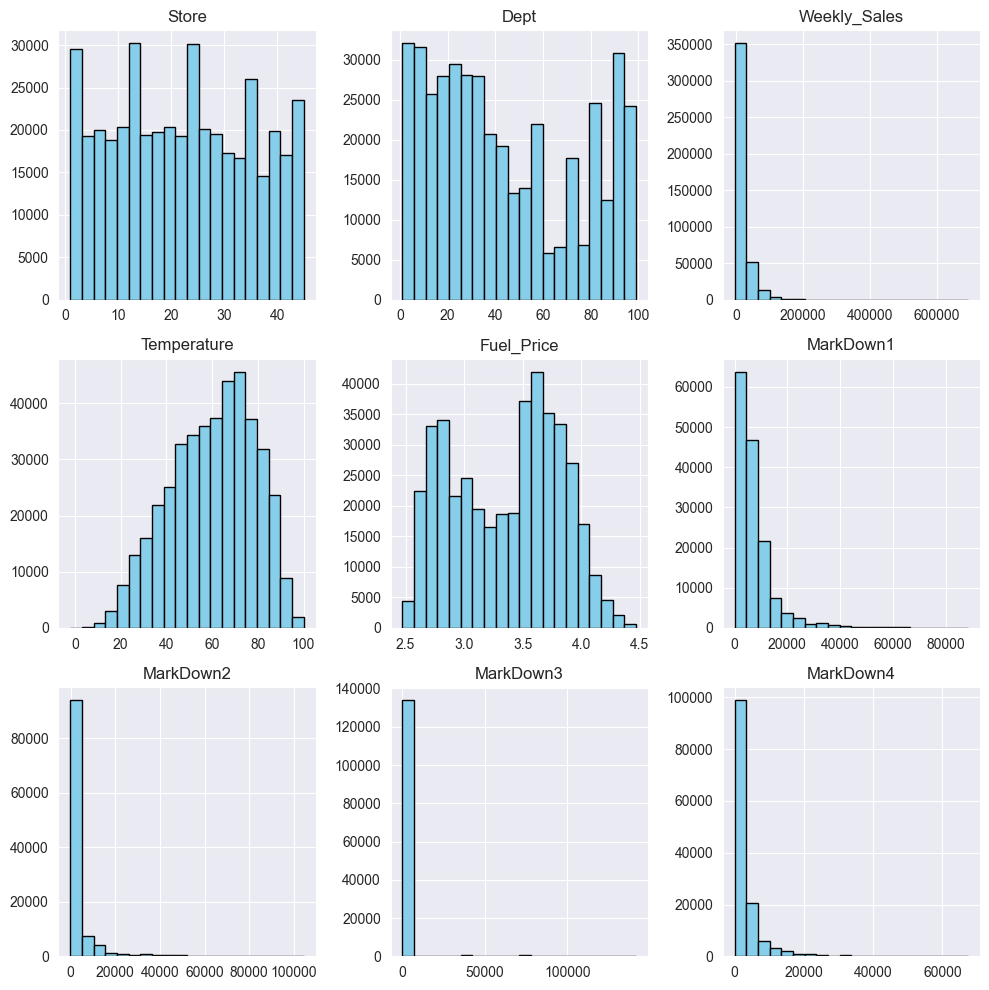

In [38]:
# Configuración de estilo
sns.set_style("darkgrid")

# Seleccionar columnas numéricas para el análisis
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Crear subplots: 3 filas x 3 columnas (puedes ajustar según tus necesidades)
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# Índice para recorrer las columnas
cnt = 0

# Graficar histogramas de las columnas numéricas seleccionadas
for ax in axs.reshape(-1):
    if cnt < len(numerical_columns):
        column = numerical_columns[cnt]
        ax.hist(df[column].dropna(), bins=20, color="skyblue", edgecolor="black")
        ax.set_title(column, fontsize=12)
        cnt += 1
    else:
        # Si no hay más columnas, ocultar los ejes vacíos
        ax.axis('off')

# Ajustar el diseño
plt.tight_layout()
plt.show()

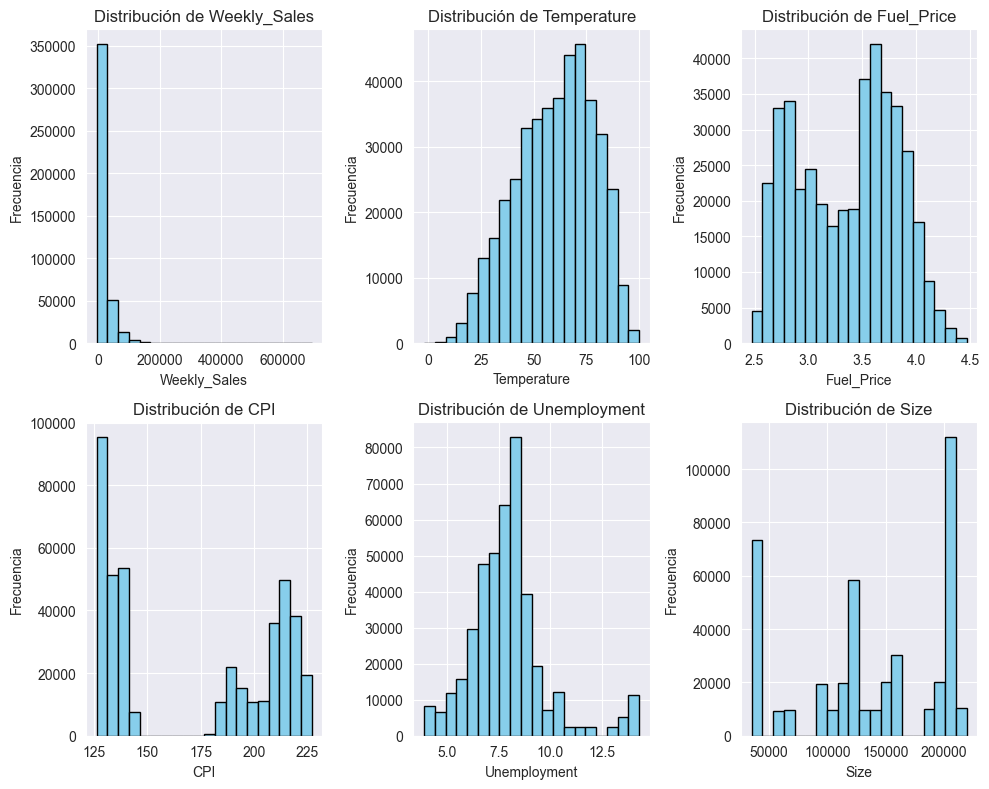

In [42]:
# Configuración de estilo
sns.set_style("darkgrid")

# Lista de columnas a visualizar
selected_columns = ["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment", "Size"]

# Crear subplots: 2 filas x 3 columnas para 6 gráficos
fig, axs = plt.subplots(2, 3, figsize=(10, 8))

# Graficar histogramas para las columnas seleccionadas
for ax, column in zip(axs.reshape(-1), selected_columns):
    ax.hist(df[column].dropna(), bins=20, color="skyblue", edgecolor="black")
    ax.set_title(f"Distribución de {column}", fontsize=12)
    ax.set_xlabel(column)
    ax.set_ylabel("Frecuencia")

# Ajustar diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

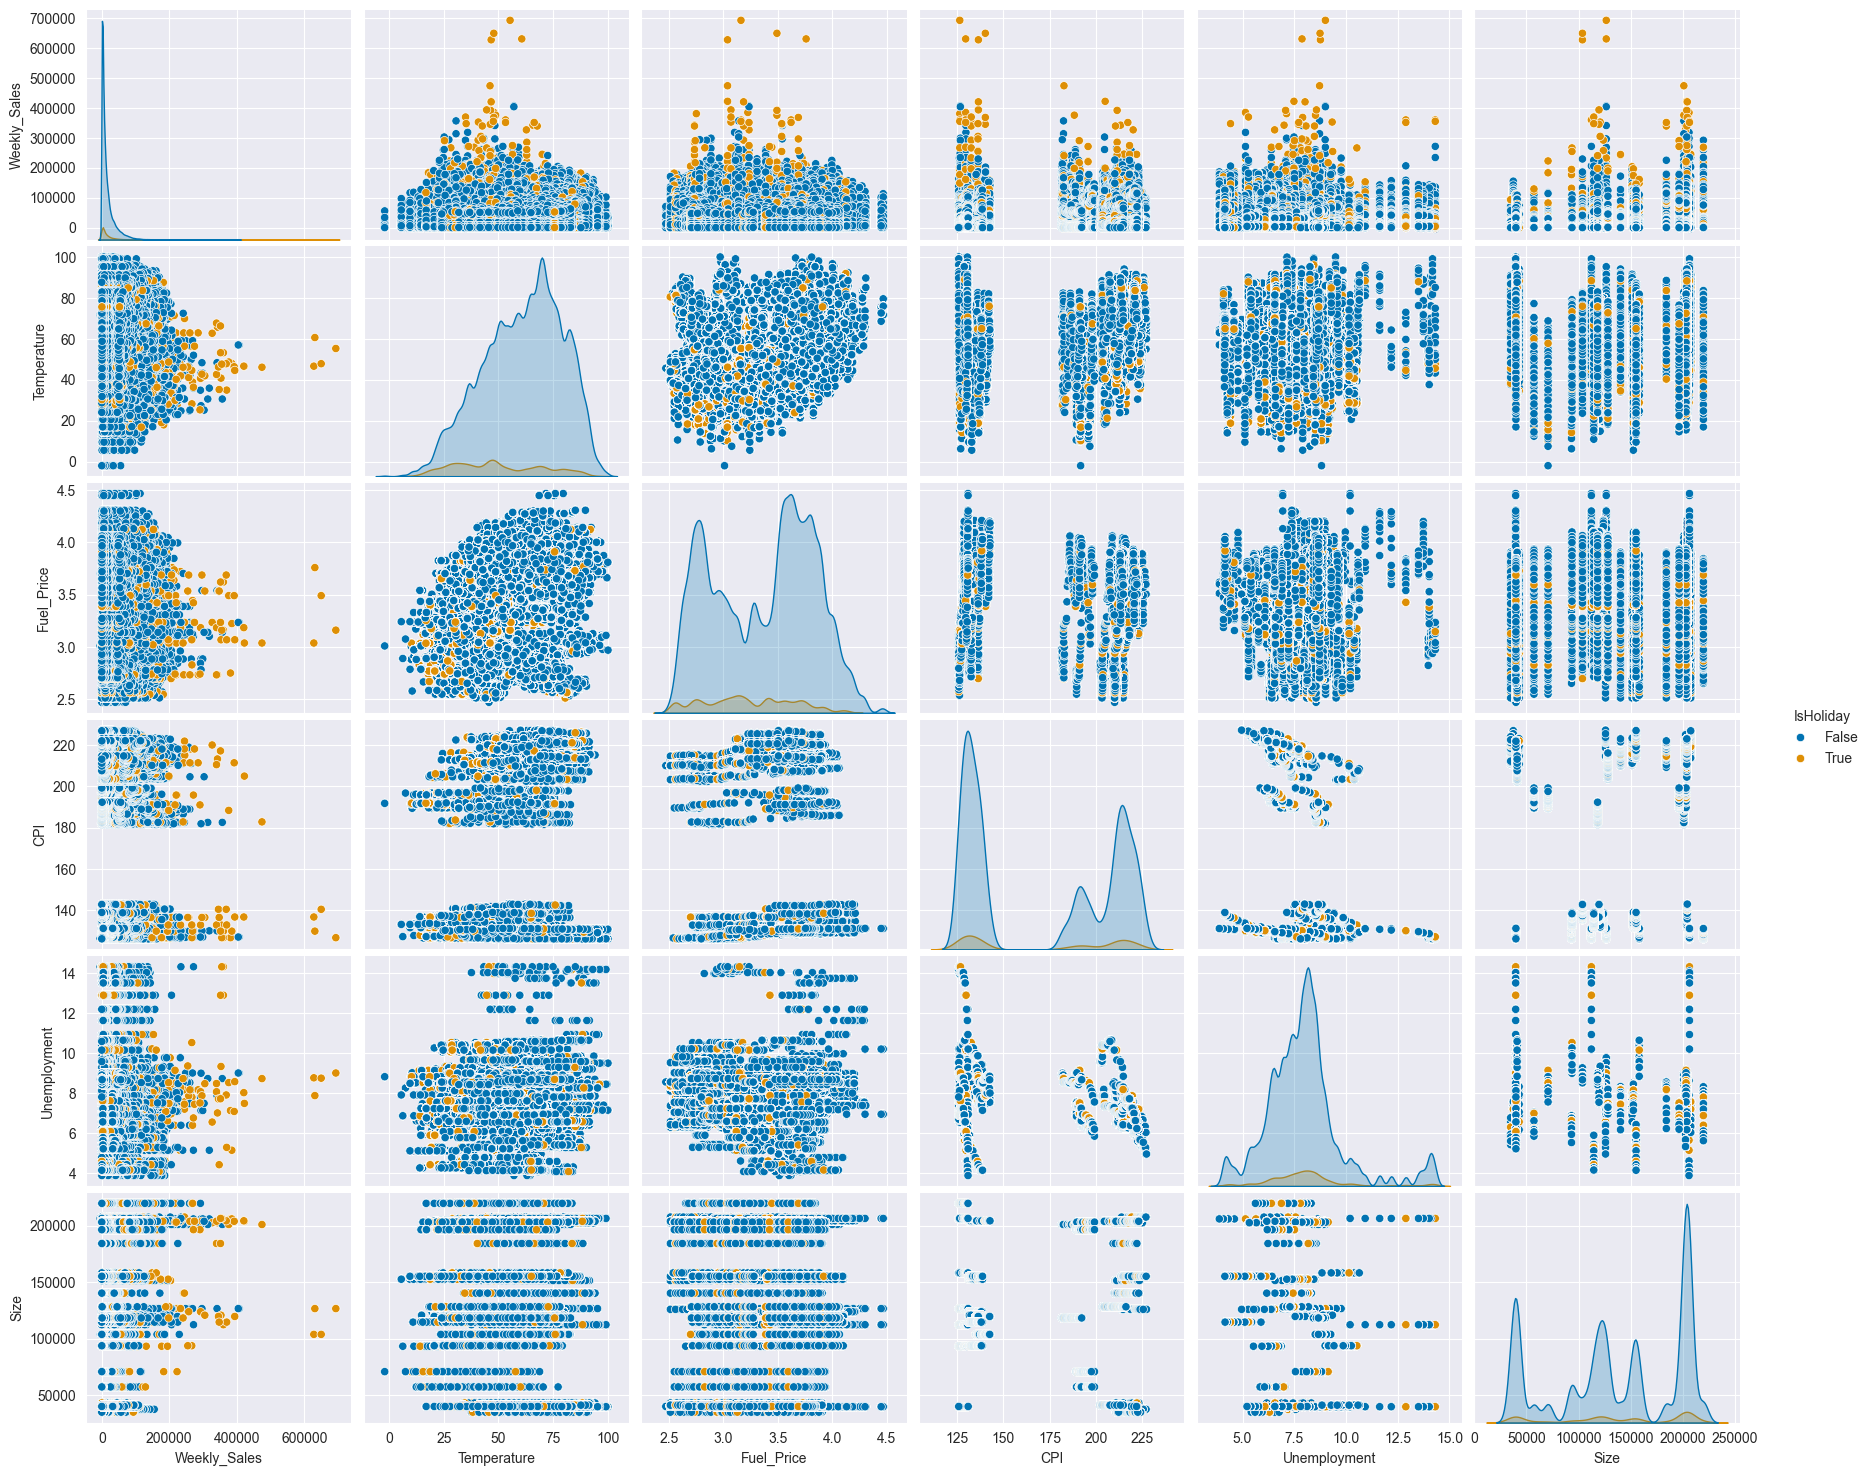

In [44]:
# Selección de columnas numéricas y 'IsHoliday' para analizar correlaciones
num_feature_cols = ["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment", "Size"]
selected_cols = num_feature_cols + ["IsHoliday"]

# Crear un DataFrame temporal con las columnas seleccionadas
df_temp = df[selected_cols]

# Visualización de pairplot diferenciando por 'IsHoliday'
sns.pairplot(data=df_temp, hue="IsHoliday", palette="colorblind",height=2.5, aspect=1.2)
plt.show()

Relación entre Temperature y Weekly_Sales

- No se observa una relación clara entre Temperature y Weekly_Sales. Los puntos están dispersos.
- Esto sugiere que la temperatura no tiene un impacto fuerte en las ventas.

Relación entre Fuel_Price y Weekly_Sales

- Existe cierta variabilidad en las ventas (Weekly_Sales) con respecto al precio del combustible, pero no se observa un patrón lineal claro.
- Es posible que otras variables confundan esta relación.

Relación entre CPI y Weekly_Sales

- La variable CPI no muestra una relación clara con Weekly_Sales.
- Sin embargo, la distribución de CPI parece multimodal (varias agrupaciones).

Relación entre Unemployment y Weekly_Sales

- No se observa una relación clara entre la tasa de desempleo y las ventas.
- Sin embargo, el desempleo tiene una distribución centralizada entre valores específicos.

Relación entre Size y Weekly_Sales

- Existe una ligera tendencia: tiendas más grandes tienden a tener mayores ventas.
- Sin embargo, no es una relación perfecta, ya que hay variabilidad en tiendas del mismo tamaño.


In [46]:
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Weekly_Sales'] < lower_bound) | (df['Weekly_Sales'] > upper_bound)]
print(f"Cantidad de outliers: {outliers.shape[0]}")

Cantidad de outliers: 35521


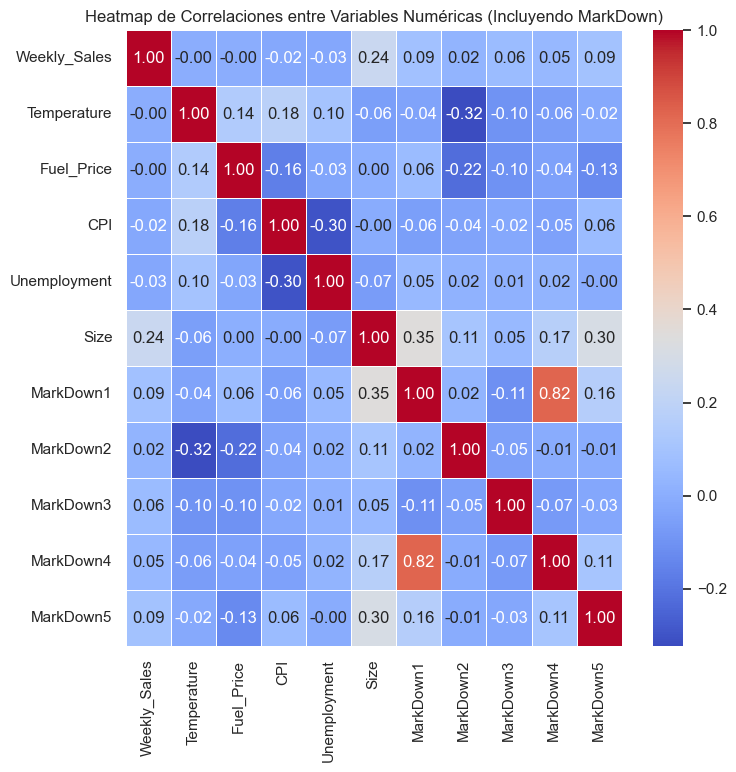

In [49]:
# Selección de las columnas numéricas para calcular la correlación (incluyendo todas las variables MarkDown)
num_cols = ["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", 
            "Unemployment", "Size", "MarkDown1", "MarkDown2", "MarkDown3", 
            "MarkDown4", "MarkDown5"]

# Cálculo de la matriz de correlaciones
correlation_matrix = df[num_cols].corr()

# Crear el heatmap
plt.figure(figsize=(8, 8))  # Ajustar tamaño del gráfico
sns.set(font_scale=1)  # Ajustar tamaño de la fuente
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Personalizar el gráfico
plt.title("Heatmap de Correlaciones entre Variables Numéricas (Incluyendo MarkDown)")
plt.show()

Correlaciones con Weekly_Sales

- Size (0.24): Es la variable con mayor correlación positiva con Weekly_Sales. Las tiendas más grandes tienden a tener mayores ventas.
- MarkDown1 (0.09) y MarkDown5 (0.09): Tienen una correlación positiva débil con Weekly_Sales. Estas promociones podrían estar ligeramente asociadas con un aumento en las ventas.

Correlaciones fuertes entre variables MarkDown

- MarkDown1 y MarkDown4 (0.82): Existe una correlación fuerte entre estas dos variables, indicando que las promociones o descuentos de MarkDown4 podrían estar relacionadas con las de MarkDown1.
- MarkDown4 y MarkDown5 (0.82): También muestran una fuerte relación, lo cual sugiere un patrón compartido entre las promociones.

Relaciones negativas:

- MarkDown2 y Temperature (-0.32): Existe una correlación negativa moderada. Las promociones podrían ser más frecuentes cuando las temperaturas son bajas.

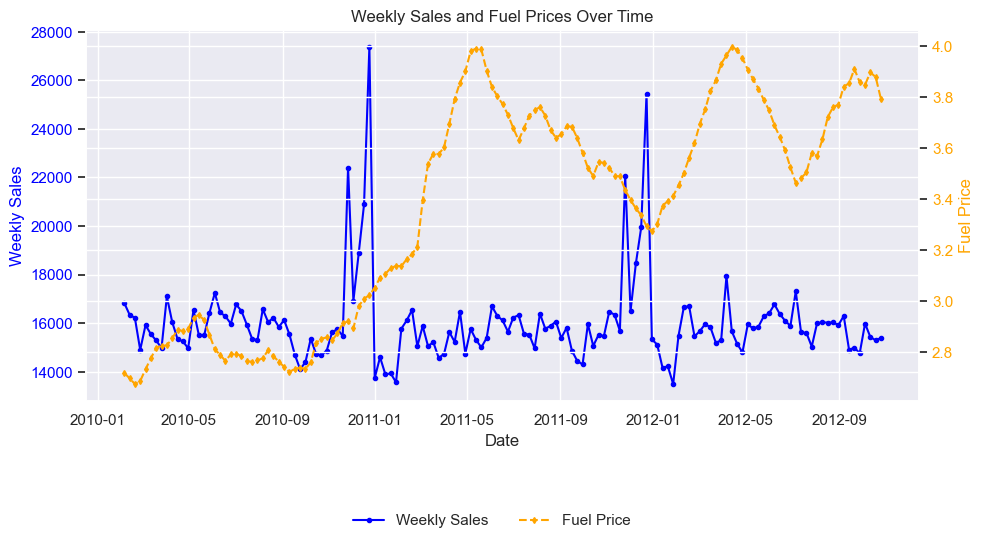

In [55]:
# Gráfico de Weekly_Sales y Fuel_Price con dos ejes y escalas
fig, ax1 = plt.subplots(figsize=(10, 5))

# Weekly Sales en el eje primario
ax1.plot(weekly_sales_trend['Date'], weekly_sales_trend['Weekly_Sales'], 
         label="Weekly Sales", color='blue', linestyle='-', marker='o', markersize=3)
ax1.set_xlabel('Date')
ax1.set_ylabel('Weekly Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear eje secundario para Fuel Price
ax2 = ax1.twinx()
ax2.plot(fuel_price_trend['Date'], fuel_price_trend['Fuel_Price'], 
         label="Fuel Price", color='orange', linestyle='--', marker='d', markersize=3)
ax2.set_ylabel('Fuel Price', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Añadir leyenda en la parte baja fuera del gráfico
fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)

# Título del gráfico
plt.title('Weekly Sales and Fuel Prices Over Time')

# Ajustar márgenes del gráfico
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Deja espacio para la leyenda inferior
plt.show()

C:\Users\cafef\AppData\Local\Temp\ipykernel_24168\236016221.py:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "d" (-> marker='d'). The keyword argument will take precedence.
  plt.plot(CPI_trend['Date'], CPI_trend['CPI'], 'd', linestyle='-', marker='o', markersize=3, color='blue')


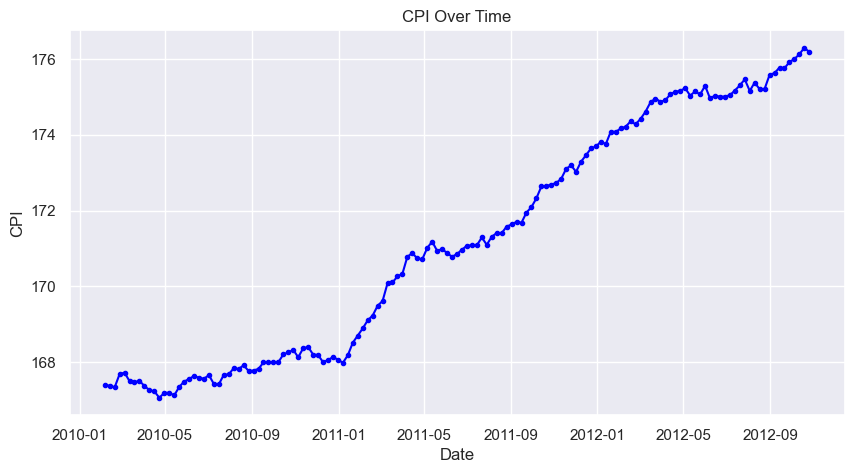

In [59]:
# Agrupar por fecha y calcular el promedio de CPI
CPI_trend = df.groupby('Date')['CPI'].mean().reset_index()

# Crear gráfico de línea para CPI
plt.figure(figsize=(10, 5))
plt.plot(CPI_trend['Date'], CPI_trend['CPI'], 'd', linestyle='-', marker='o', markersize=3, color='blue')

# Personalizar el gráfico
plt.title('CPI Over Time')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.grid(True)
plt.show()

C:\Users\cafef\AppData\Local\Temp\ipykernel_24168\3430286340.py:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "d" (-> marker='d'). The keyword argument will take precedence.
  plt.plot(Unemployment_trend['Date'], Unemployment_trend['Unemployment'],


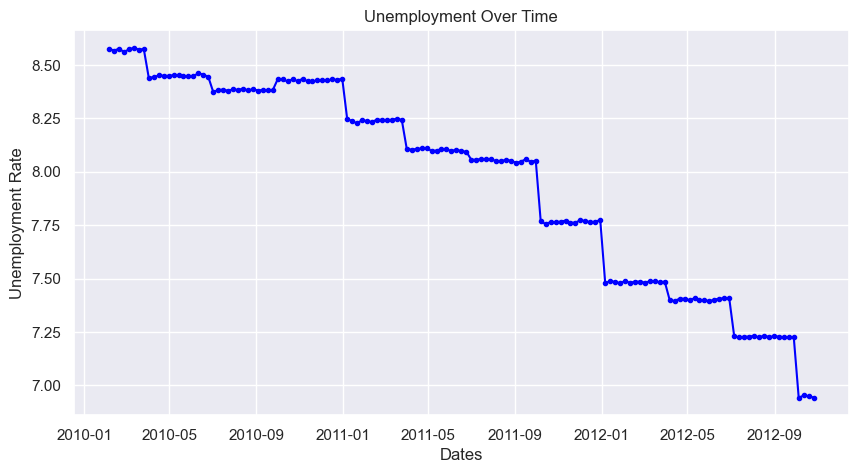

In [61]:
# Agrupar por fecha y calcular el promedio de Unemployment
Unemployment_trend = df.groupby('Date')['Unemployment'].mean().reset_index()

# Crear gráfico de línea para Unemployment
plt.figure(figsize=(10, 5))
plt.plot(Unemployment_trend['Date'], Unemployment_trend['Unemployment'], 
         'd', linestyle='-', marker='o', markersize=3, color='blue')

# Personalización del gráfico
plt.title('Unemployment Over Time')
plt.xlabel('Dates')
plt.ylabel('Unemployment Rate')
plt.grid(True)

plt.show()

In [62]:
# Visualización de Múltiples Variables
# Crear tendencias promedio
Unemployment_trend = df.groupby('Date')['Unemployment'].mean().reset_index()
weekly_sales_trend = df.groupby('Date')['Weekly_Sales'].mean().reset_index()
CPI_trend = df.groupby('Date')['CPI'].mean().reset_index()
Fuel_trend = df.groupby('Date')['Fuel_Price'].mean().reset_index()

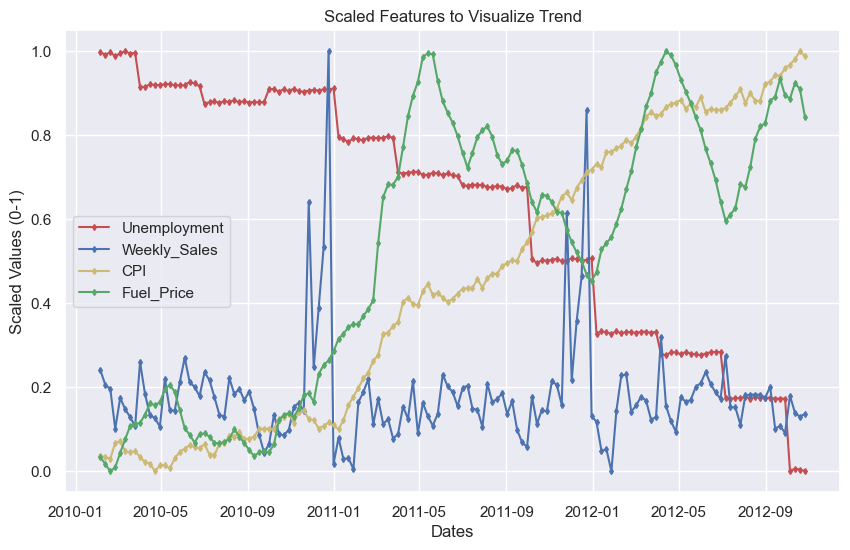

In [66]:
# Definir la función de escalamiento Min-Max
def min_max_scale(series):
    min_val = series.min()
    max_val = series.max()
    return (series - min_val) / (max_val - min_val)

# Visualización de tendencias escaladas
plt.figure(figsize=(10, 6))

plt.plot(Unemployment_trend['Date'], min_max_scale(Unemployment_trend['Unemployment']), 
         'd-', markersize=3, c='r', label='Unemployment')
plt.plot(weekly_sales_trend['Date'], min_max_scale(weekly_sales_trend['Weekly_Sales']), 
         'd-', markersize=3, c='b', label='Weekly_Sales')
plt.plot(CPI_trend['Date'], min_max_scale(CPI_trend['CPI']), 
         'd-', markersize=3, c='y', label='CPI')
plt.plot(Fuel_trend['Date'], min_max_scale(Fuel_trend['Fuel_Price']), 
         'd-', markersize=3, c='g', label='Fuel_Price')

# Personalización del gráfico
plt.legend()
plt.title('Scaled Features to Visualize Trend')
plt.xlabel('Dates')
plt.ylabel('Scaled Values (0-1)')
plt.grid(True)
plt.show()

Análisis del Gráfico

Fuel_Price (Verde):

- Se observa una tendencia al alza constante desde principios de 2010 hasta mediados de 2012, con picos y caídas temporales.
- Esto sugiere un aumento en los precios del combustible que podría afectar directamente los costos y, posiblemente, las ventas.

Weekly_Sales (Azul):

- Las ventas semanales muestran fluctuaciones significativas, con picos pronunciados en finales de 2010 y principios de 2012.
- Estos picos coinciden con temporadas festivas (IsHoliday = True) o eventos especiales, indicando una fuerte correlación con estos períodos.

CPI (Amarillo):

- El Índice de Precios al Consumidor (CPI) muestra un crecimiento constante durante todo el período, especialmente a partir de mediados de 2011.
- Esto podría indicar inflación, lo que probablemente impacte tanto en los precios como en el comportamiento del consumidor.

Unemployment (Rojo):

- La tasa de desempleo permanece alta al principio (2010) y comienza a disminuir gradualmente a partir de 2011.
- Sin embargo, en 2012 vuelve a aumentar ligeramente, lo que podría tener un impacto en el poder adquisitivo y las ventas.

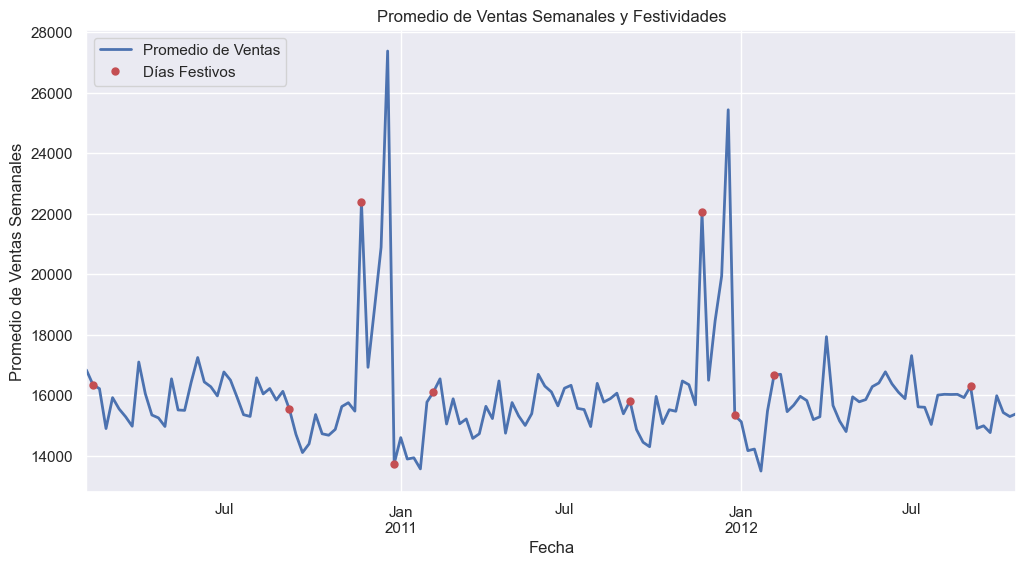

In [67]:
# Evolución temporal de las ventas semanales (Weekly_Sales)
# Crear una figura y un eje para el gráfico
fig, ax = plt.subplots(figsize=(12, 6))  # Ajustar tamaño para mejor visualización

# Promedio de ventas semanales a lo largo del tiempo
df[['Date', 'Weekly_Sales']].groupby('Date').mean().plot(ax=ax, color='b', linewidth=2)

# Promedio de ventas semanales durante los días festivos
df[df['IsHoliday'] == True][['Date', 'Weekly_Sales']].groupby('Date').mean().plot(
    style='o', ax=ax, color='r', markersize=5)

# Personalización del gráfico
ax.set_title('Promedio de Ventas Semanales y Festividades')
ax.set_xlabel('Fecha')
ax.set_ylabel('Promedio de Ventas Semanales')
ax.legend(['Promedio de Ventas', 'Días Festivos'], loc='upper left')
plt.grid(True)

# Mostrar el gráfico
plt.show()

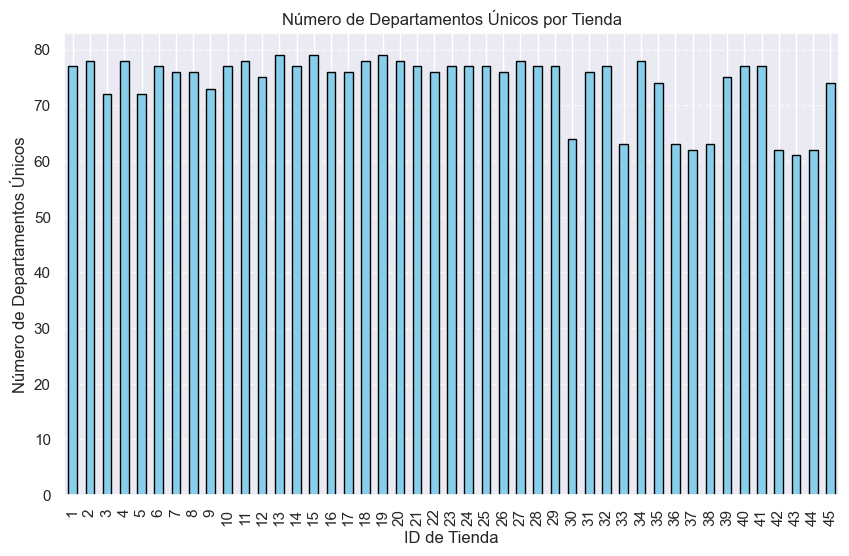

In [71]:
# Contar el número de departamentos únicos (Dept) en cada tienda (Store)
# Calcular el número de departamentos únicos por tienda y graficarlo
unique_depts_per_store = df.groupby(['Store']).nunique().Dept

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
unique_depts_per_store.plot(kind='bar', color='skyblue', edgecolor='black')

# Personalización del gráfico
plt.title('Número de Departamentos Únicos por Tienda')
plt.xlabel('ID de Tienda')
plt.ylabel('Número de Departamentos Únicos')
plt.xticks(rotation=90)  # Rotar etiquetas para mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

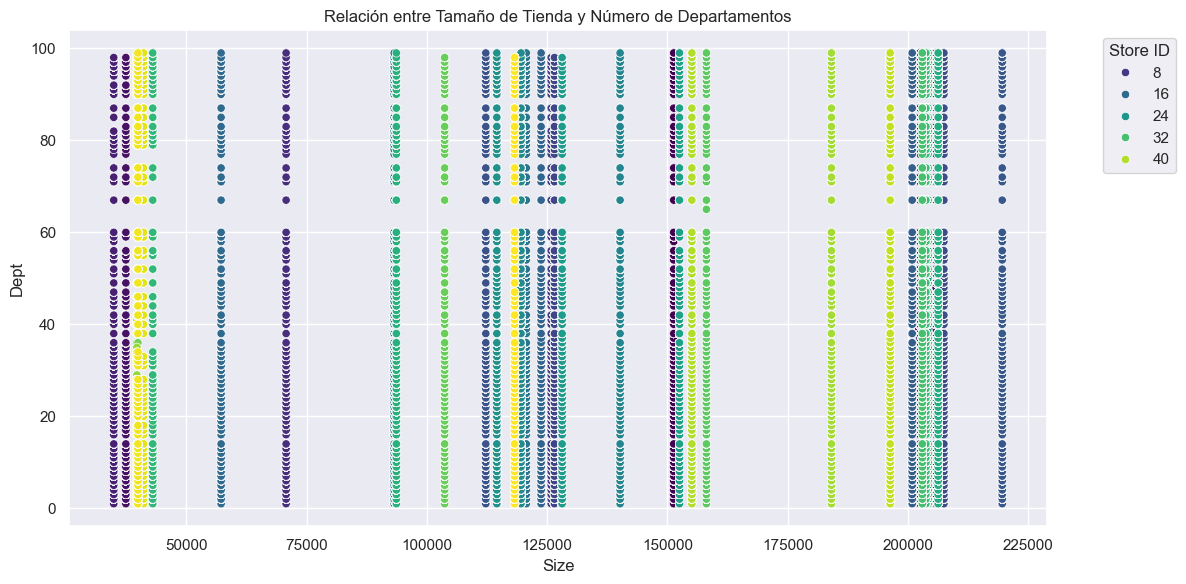

In [ ]:
# Relacionar el número de departamentos con Weekly_Sales para identificar patrones
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Size', y='Dept', hue='Store', palette='viridis')
plt.title('Relación entre Tamaño de Tienda y Número de Departamentos')

# Ubicación fija de la leyenda (ejemplo: fuera del gráfico)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Store ID")
plt.tight_layout()
plt.show()

In [73]:
# Filtrar las tiendas con menor número de departamentos para un análisis más detallado
low_dept_stores = df.groupby('Store')['Dept'].nunique().sort_values().head(5)
print("Tiendas con menor número de departamentos:\n", low_dept_stores)

Tiendas con menor número de departamentos:
 Store
43    61
44    62
37    62
42    62
33    63
Name: Dept, dtype: int64


In [89]:
print(df_full_c.head())  # Revisa si hay datos válidos
print(df_full_c.index.freq)  # Verifica la frecuencia del índice

            Weekly_Sales
Date                    
2010-02-05  16836.121997
2010-02-12  16352.056032
2010-02-19  16216.658979
2010-02-26  14899.549688
2010-03-05  15921.015727
<Week: weekday=4>


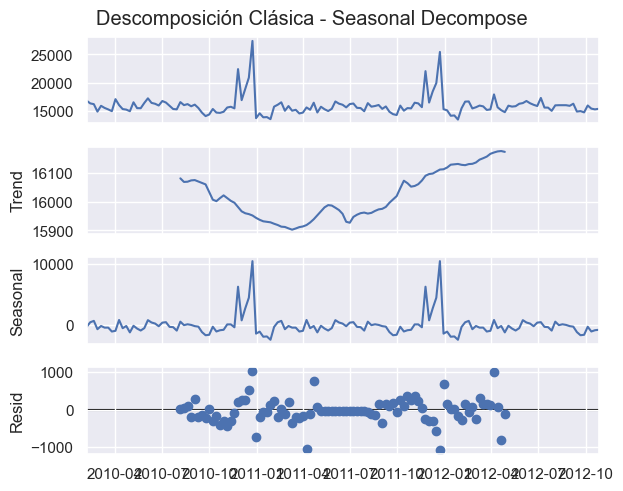

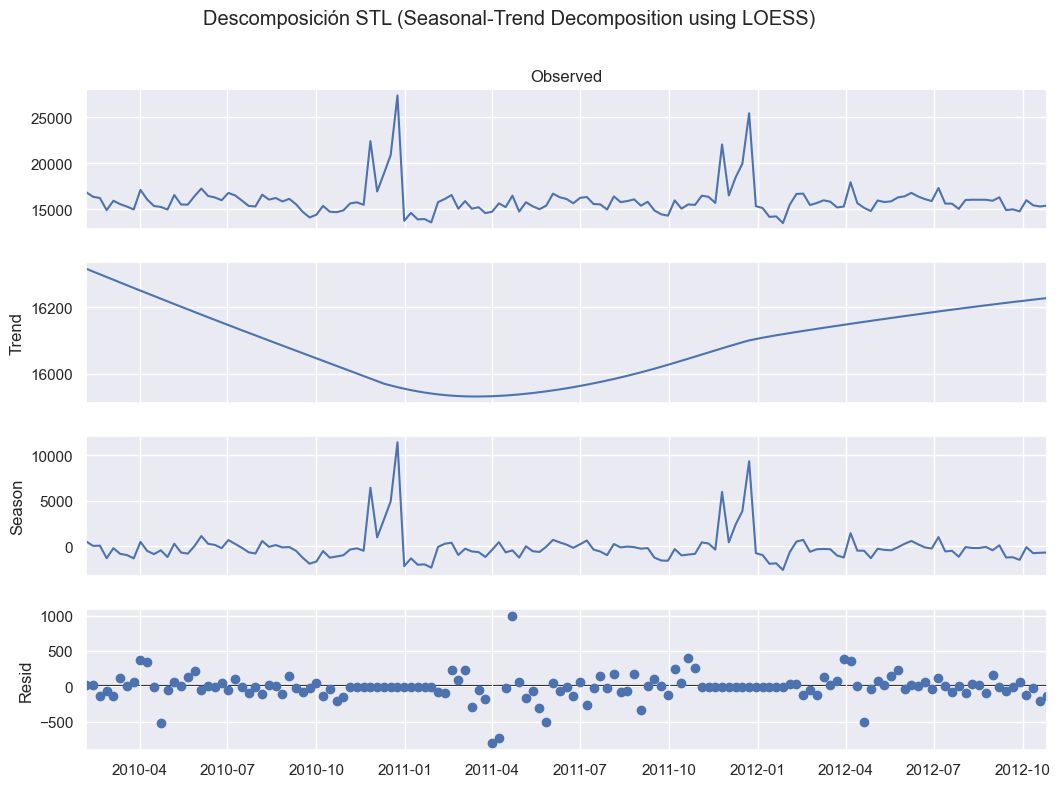

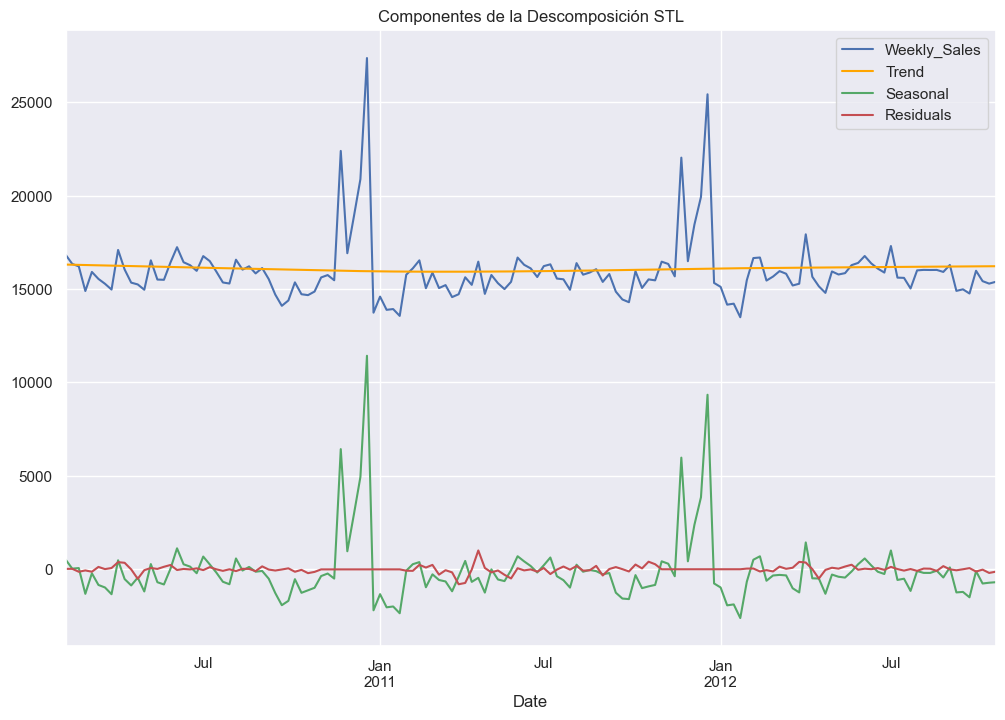

In [84]:
# Descomposición Clásica con seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import matplotlib.pyplot as plt

results = seasonal_decompose(df_full_c, model='additive')  # Modelo aditivo
results.plot()
plt.suptitle('Descomposición Clásica - Seasonal Decompose', y=1.02)
plt.show()

# Descomposición STL
results2 = STL(df_full_c, seasonal=13).fit()
fig = results2.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Descomposición STL (Seasonal-Trend Decomposition using LOESS)', y=1.02)
plt.show()

# Gráfico Comparativo de los Componentes de STL
fig, ax = plt.subplots(figsize=(12, 8))
results2.observed.plot(ax=ax, label='Observed', color='b')
results2.trend.plot(ax=ax, label='Trend', color='orange')
results2.seasonal.plot(ax=ax, label='Seasonal', color='g')
results2.resid.plot(ax=ax, label='Residuals', color='r')

# Personalización
ax.set_title('Componentes de la Descomposición STL')
ax.legend()
plt.show()

In [86]:
#  Aplicar Pruebas de Estacionariedad
from statsmodels.tsa.stattools import adfuller

# Prueba ADF en Weekly_Sales promedio agrupado por Date
df_full_c = df[['Date', 'Weekly_Sales']].groupby(['Date']).mean()
df_full_c.index = pd.to_datetime(df_full_c.index)
df_full_c.index.freq = 'W-FRI'

print('Results of Augmented Dickey-Fuller Test:')
adfuller_results = adfuller(df_full_c['Weekly_Sales'], autolag='AIC')
dfoutput = pd.Series(adfuller_results[:4], 
                     index=["Test Statistic", "p-value", "# of Lags Used", "# of Observations Used"])
for key, value in adfuller_results[4].items():
    dfoutput["Critical Value (%s)" % key] = value

print(dfoutput)


Results of Augmented Dickey-Fuller Test:
Test Statistic           -5.930803e+00
p-value                   2.383227e-07
# of Lags Used            4.000000e+00
# of Observations Used    1.380000e+02
Critical Value (1%)      -3.478648e+00
Critical Value (5%)      -2.882722e+00
Critical Value (10%)     -2.578065e+00
dtype: float64


Conclusiones del Resultado:
- El p-valor obtenido es 2.38e-07, que es mucho menor que 0.05.
- El Test Statistic es -5.93, que es más negativo que todos los valores críticos:

Comparado con 1%: -3.4786

Comparado con 5%: -2.8827

Comparado con 10%: -2.5781

Rechazamos la hipótesis nula (H0) y concluimos que la serie temporal Weekly_Sales es estacionaria

In [90]:
# Combinar los DataFrames train_df, features_df y stores_df
df_full = train_df.merge(features_df, on=['Store', 'Date', 'IsHoliday'], how='left')
df_full = df_full.merge(stores_df, on='Store', how='left')

# Convertir la columna Date a formato datetime y asegurarse de la frecuencia semanal
df_full['Date'] = pd.to_datetime(df_full['Date'])
df_full.set_index('Date', inplace=True)
df_full = df_full.sort_index()

In [94]:
df_full['Weekly_Sales'] = df_full['Weekly_Sales'].ffill()  # Usar ffill directamente

In [98]:
from statsmodels.tsa.seasonal import seasonal_decompose

results = seasonal_decompose(df_full_c['Weekly_Sales'], model='additive', period=52) # Periodo semanal (52 semanas al año)

In [100]:
# 3. Trabajar con Datos Desagregados:
# Agrupar 'Weekly_Sales' por 'Store', 'Dept' y 'Date'
train_c_sales = df.set_index(['Store', 'Dept', 'Date']).unstack(['Store', 'Dept'])['Weekly_Sales']
print(train_c_sales.head())

# 4. Buscar Nulos y Anomalías:
# Identificar filas donde hay valores nulos en 'Weekly_Sales'
missing_sales = train_c_sales[train_c_sales.isna().sum(axis=1) > 0]
print("Filas con valores faltantes en Weekly Sales:")
print(missing_sales)

Store             1                                                    \
Dept              1         2         3         4         5        6    
Date                                                                    
2010-02-05  24924.50  50605.27  13740.12  39954.04  32229.38  5749.03   
2010-02-12  46039.49  44682.74  10887.84  35351.21  29620.81  9135.00   
2010-02-19  41595.55  47928.89  11523.47  36826.95  26468.27  6060.26   
2010-02-26  19403.54  44292.87  11135.17  34660.16  24101.89  5244.56   
2010-03-05  21827.90  48397.98  12275.58  38086.19  23082.14  4221.25   

Store                                               ...       45            \
Dept              7         8         9         10  ...       87        90   
Date                                                ...                      
2010-02-05  21084.08  40129.01  16930.99  30721.50  ...  8818.12  32016.42   
2010-02-12  18310.31  37334.83  16562.49  31494.77  ...  5895.61  19724.40   
2010-02-19  19985.20  387

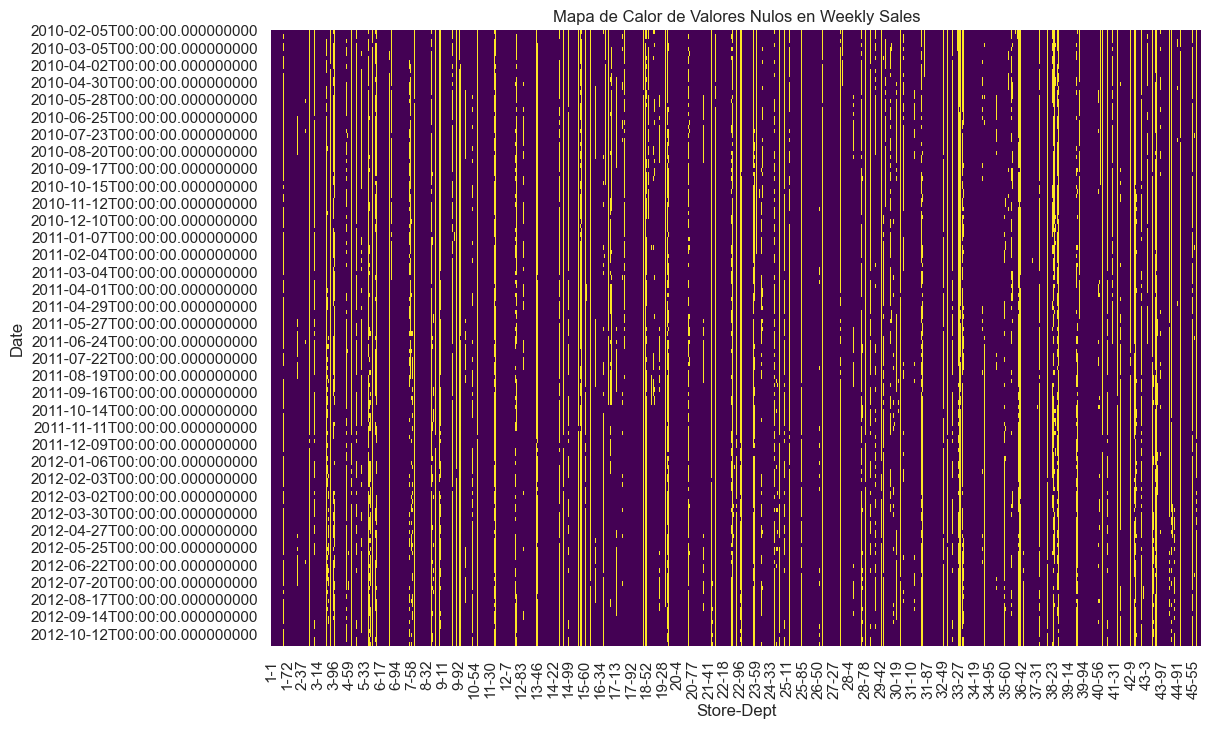

In [ ]:
# Heatmap para visualizar de manera gráfica los valores nulos en el DataFrame train_c_sales
plt.figure(figsize=(12, 8))
sns.heatmap(train_c_sales.isna(), cbar=False, cmap="viridis")
plt.title("Mapa de Calor de Valores Nulos en Weekly Sales")
plt.show()

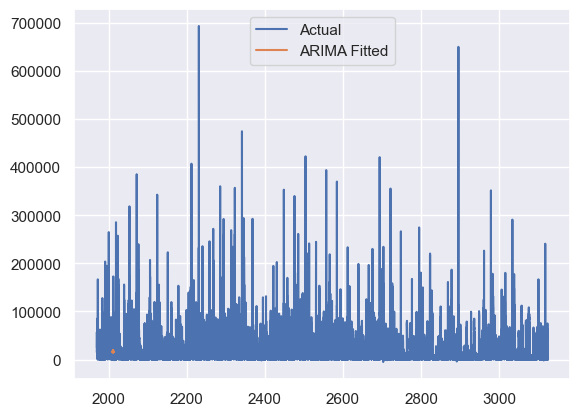

In [109]:
plt.plot(df['Weekly_Sales'], label='Actual')
plt.plot(results.fittedvalues, label='ARIMA Fitted')
plt.legend()
plt.show()

Conclusiones del Gráfico

- El modelo ARIMA parece captar la tendencia general de los datos, pero no logra ajustarse completamente a los picos y valles pronunciados de Weekly_Sales.

- Sobresaltos extremos: Hay picos muy altos en Weekly_Sales que el modelo no puede predecir adecuadamente. Esto sugiere que los datos podrían tener outliers o patrones irregulares que ARIMA no está capturando.

- La línea de ARIMA Fitted parece ser mucho más estable y suavizada en comparación con los valores reales, lo cual es típico cuando se utiliza un modelo ARIMA.

In [122]:
# Evaluar la calidad de las predicciones usando métricas de error
from sklearn.metrics import mean_squared_error
import numpy as np

# Alinear las series: tomar solo las fechas de results.fittedvalues
aligned_actual = df['Weekly_Sales'].iloc[-len(results.fittedvalues):]
aligned_fitted = results.fittedvalues

# Verificar las longitudes
print(f"Longitud valores reales: {len(aligned_actual)}")
print(f"Longitud valores ajustados: {len(aligned_fitted)}")

# Calcular RMSE
mse = mean_squared_error(aligned_actual, aligned_fitted)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

Longitud valores reales: 143
Longitud valores ajustados: 143
RMSE: 15161.40003553148


Interpretación del RMSE

- El RMSE es relativamente alto en comparación con los valores observados de Weekly_Sales, que típicamente oscilan entre 0 y 600,000.
- Un RMSE alto sugiere que el modelo ARIMA actual no está capturando bien la estructura de los datos. Posibles causas:

          Alta volatilidad en los datos.

          Necesidad de ajustar los parámetros p,d,q del modelo ARIMA.

          Inclusión de variables adicionales (exógenas) como Fuel_Price, CPI o Unemployment.